# Exercise 8 Solution: Non-Parametric Testing with the Sign and Wilcoxon Tests
In this exercise, we explore essential non-parametric methods for analyzing neuroscience data when assumptions of normality or interval-scale measurement may not be satisfied. These tests are especially useful in EEG, ERP, and behavioral studies where data distributions are skewed, contain outliers, or sample sizes are small.

Specifically, we will:

1. **The Sign Test for Directional Change:** Learn how the Sign test can detect consistent directional effects across paired observations without considering the magnitude of differences. We apply this to pre-post comparisons in reaction time data following a cognitive intervention to determine if a consistent improvement is observed.

2. **The Wilcoxon Signed-Rank Test for Paired Effects:** Use the Wilcoxon signed-rank test to assess whether there is a statistically significant median difference between two paired conditions. This test leverages both the sign and rank of differences, making it more sensitive than the Sign test while still avoiding parametric assumptions.

3. **Application to ERP and Reaction Time Data:** Simulate and analyze EEG-derived P300 amplitude changes between baseline and attention conditions, and RT changes before and after drug administration. These examples highlight the practical relevance of non-parametric tests in real-world neuroscience experiments.

4. **Why Non-Parametric?** Compare the assumptions of parametric (e.g., t-tests) and non-parametric approaches, and understand why the Wilcoxon and Sign tests are better suited for small, noisy, or non-normally distributed neuroscience data. We explore their robustness to outliers and interpretability for rank-based or ordinal data.

5. **Interpreting Non-Parametric Results:** Gain experience reading and interpreting Wilcoxon and Sign test outputs in Python, including test statistics and p-values, while reinforcing good practice in choosing the right statistical method for your data type.

By the end of this exercise, you’ll understand how to apply non-parametric hypothesis tests to paired neuroscience data using the Sign test and Wilcoxon test. You'll also be able to justify their use over t-tests when key assumptions are violated, improving the robustness and interpretability of your experimental findings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest, wilcoxon


## Exercise 1: Sign Test for RT data

In [2]:
# Simulated reaction time data (in milliseconds) for 12 participants
# Lower RT is better
rt_pre = np.array([510, 490, 495, 500, 505, 520, 515, 480, 500, 505, 498, 510])
rt_post = np.array([480, 470, 480, 490, 495, 510, 500, 460, 490, 490, 480, 495])

In [3]:
# Calculate differences
diff = rt_post - rt_pre
print("Differences (Post - Pre):", diff)

# 1. Sign Test (only direction, not magnitude)
n_positive = np.sum(diff > 0)
n_negative = np.sum(diff < 0)
n = n_positive + n_negative  # exclude ties

# Use the smaller count for binomial test
result = binomtest(k=min(n_positive, n_negative), n=n, p=0.5, alternative='two-sided')
print(f"Sign Test p-value: {result.pvalue:.4f}")



Differences (Post - Pre): [-30 -20 -15 -10 -10 -10 -15 -20 -10 -15 -18 -15]
Sign Test p-value: 0.0005


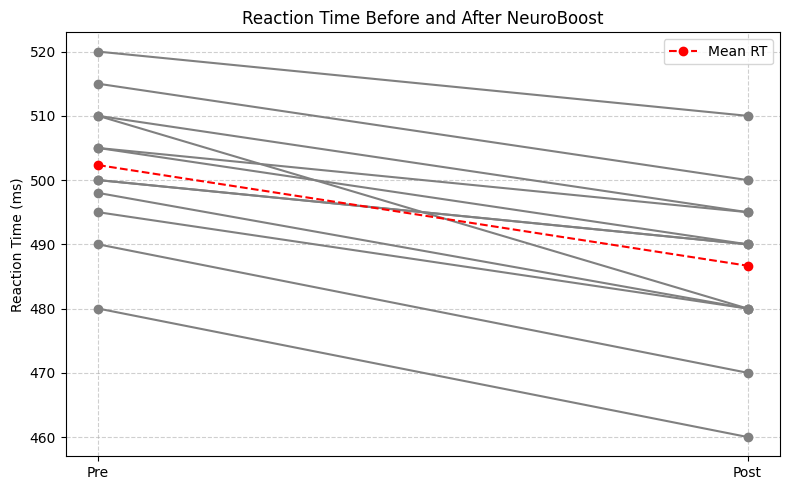

In [8]:
# Create paired plot
plt.figure(figsize=(8, 5))
for i in range(len(rt_pre)):
    plt.plot(['Pre', 'Post'], [rt_pre[i], rt_post[i]], marker='o', color='gray', linewidth=1.5)

# Highlight average change
mean_pre = np.mean(rt_pre)
mean_post = np.mean(rt_post)
plt.plot(['Pre', 'Post'], [mean_pre, mean_post], marker='o', linestyle='--', color='red', label='Mean RT')

# Customize plot
plt.title('Reaction Time Before and After NeuroBoost')
plt.ylabel('Reaction Time (ms)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

NeuroBoost appears to have a consistent and significant effect on reaction time.
All participants showed faster responses after taking the drug, and the Sign Test confirmed this consistent reduction in RT is unlikely due to chance (p = 0.0005).

### Why use a sign test instead of a t-test here?

The sign test is used because it does not assume a normal distribution of the data. Reaction time (RT) data is often non-normally distributed, skewed, or contains outliers, especially in small samples. The t-test requires the differences in RT to be approximately normally distributed, which might not hold true here.

The sign test, on the other hand:

* Uses only the direction of change (not the magnitude),

* Is robust to outliers and non-normal data,

* Is especially useful with small sample sizes, where assumptions of parametric tests are hard to verify.

### Would the result change if you had more participants or more trials per participant?


Yes, increasing the sample size or number of trials would likely improve the reliability of the result.

* **More participants** → Increases the power of the sign test. With a larger sample, it's easier to detect a consistent pattern of improvement if one truly exists.

* **More trials per participant** → Allows you to compute average RT per condition, which reduces variability and improves estimate stability. With more precise averages, you could then even consider more robust non-parametric tests like the Wilcoxon signed-rank test, which uses both direction and magnitude of differences.


## Example 2: Exercise 2: Wilcoxon Test on ERP Data

In [4]:
# Simulated P300 amplitudes (µV) for 15 participants
np.random.seed(42)
p300_baseline = np.random.normal(loc=4.0, scale=0.6, size=15)
p300_task = p300_baseline + np.random.normal(loc=0.8, scale=0.5, size=15)  # expected increase


In [6]:
# Wilcoxon signed-rank test: one-tailed (expecting task > baseline)
stat, p_value = wilcoxon(p300_task, p300_baseline, alternative='greater')

print("P300 Baseline:", np.round(p300_baseline, 2))
print("P300 Task:", np.round(p300_task, 2))
print(f"\nWilcoxon Signed-Rank Test statistic: {stat:.3f}")
print(f"p-value: {p_value}")

P300 Baseline: [4.3  3.92 4.39 4.91 3.86 3.86 4.95 4.46 3.72 4.33 3.72 3.72 4.15 2.85
 2.97]
P300 Task: [4.82 4.21 5.35 5.26 3.95 5.39 5.63 5.29 3.81 4.85 4.58 3.95 5.13 3.35
 3.62]

Wilcoxon Signed-Rank Test statistic: 120.000
p-value: 3.0517578125e-05


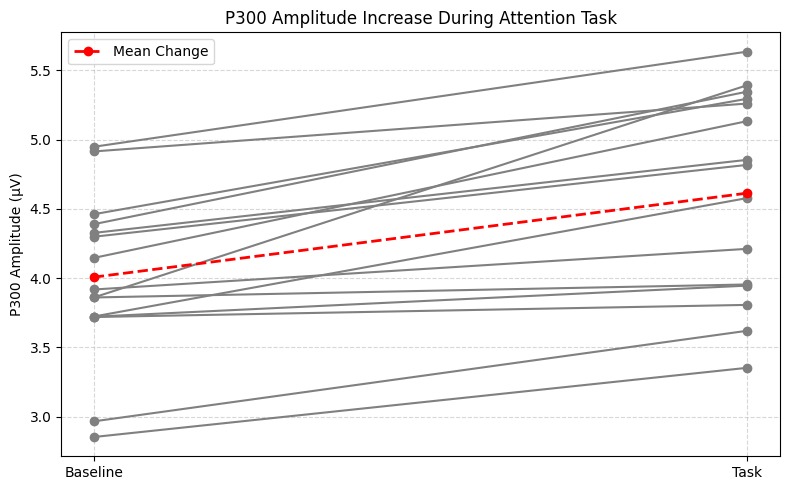

In [7]:
# Plot
plt.figure(figsize=(8, 5))
for i in range(len(p300_baseline)):
    plt.plot(['Baseline', 'Task'], [p300_baseline[i], p300_task[i]], marker='o', color='gray', linewidth=1.5)

# Highlight mean change
plt.plot(['Baseline', 'Task'], [np.mean(p300_baseline), np.mean(p300_task)],
         color='red', linestyle='--', marker='o', label='Mean Change', linewidth=2)

plt.title("P300 Amplitude Increase During Attention Task")
plt.ylabel("P300 Amplitude (µV)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

###  Did P300 amplitude significantly increase during the attention task?
Yes. The p-value is 3.0517578125e-05, which is far below the standard α = 0.05.
This provides strong evidence that P300 amplitudes are significantly higher during the attention task compared to passive listening.


### Why is the Wilcoxon test more appropriate than a paired t-test in this case?
The Wilcoxon Signed-Rank Test is more appropriate because:

* ERP amplitudes (like P300) are often not normally distributed, especially with small samples.

* Non-parametric tests like Wilcoxon do not assume normality and are more robust to outliers.

* It's a paired test that uses both sign and magnitude of the difference.